***
# Problem 6: Newton-Raphson method

Given the equation $$e^{0.3x}ln(x) = x+2$$
We can write it as $$y = e^{0.3x}ln(x)-x-2 $$
Finding the derivative $$y^{'}=0.3e^{0.3x}ln(x)+\frac{e^{0.3x}}{x}-1$$
Performing iteration with the below equation taking x=6 as the initial guess $$x_{i+1} = x_{i} - \frac{f_{i}}{f^{'}_{i}} $$ 

x =  4.89389362525


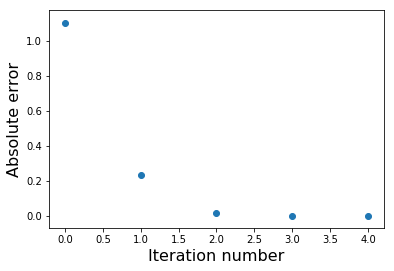

Iteration number   Absolute error 
---------------- -----------------
               0     1.10610637475
               1     0.23512441327
               2   0.0129258473651
               3 4.13628589619e-05
               4 4.28117985507e-10


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.table import Table, Column
import math 

x=6
y=np.exp(0.3*x)*np.log(x)-2-x
lx = []
ly = []
error = []
exact = []
i = 0
itera = []
while y > 0.00001:
	y=np.exp(0.3*x)*np.log(x)-2-x
	dy=0.3*np.exp(0.3*x)*np.log(x)+(1/x)*np.exp(0.3*x) - 1
	xn = x - (y/dy)
	lx.append(x)
	x = xn
	ly.append(y)
	i = i+1
print("x = ",x)

# exact solution 4.89389362525
for x in range(i):
	exact.append(4.89389362525)
	itera.append(x)
    
for x in range(i):
	error.append(abs(lx[x]-exact[x]))
# potting the points
plt.scatter(itera, error, marker='o')
plt.ylabel('Absolute error', fontsize=16)
plt.xlabel('Iteration number', fontsize=16)
plt.show()
t = Table([itera, error], names=('Iteration number', 'Absolute error'))
print(t)

# Problem 5: Trapezoidal Method










 No        h         IntegralApprox  IntegralExact       Error      
--- ---------------- -------------- -------------- -----------------
  1  0.0666666666667  1.10708946485  1.10714871779 5.92529394907e-05
  2  0.0333333333333  1.10713390337  1.10714871779 1.48144200054e-05
  3  0.0222222222222  1.10714213351  1.10714871779  6.5842843413e-06
  4  0.0166666666667  1.10714501412  1.10714871779 3.70367924885e-06
  5  0.0133333333333  1.10714634743  1.10714871779 2.37036049411e-06
  6  0.0111111111111  1.10714707171  1.10714871779 1.64608589537e-06
  7 0.00952380952381  1.10714750842  1.10714871779 1.20937024217e-06
  8 0.00833333333333  1.10714779187  1.10714871779 9.25924618533e-07
  9 0.00740740740741   1.1071479862  1.10714871779 7.31595066972e-07
 10 0.00666666666667   1.1071481252  1.10714871779 5.92592197535e-07

 Slope of the log-log curve is:  1.99996185283


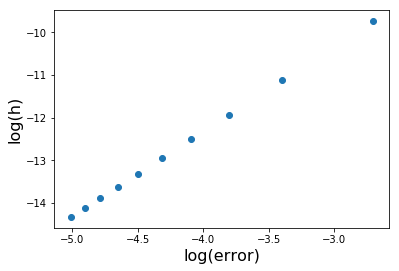

In [3]:
from astropy.table import Table, Column
import matplotlib.pyplot as plt
import numpy as np 

a=0
b=2
ival=[]
hval=[]
no = []
exact = []
error =[]
def calculate(n):
	h=(b-a)/n
	hval.append(h)
	A=0
	for x in range(n):
		A=A+0.5*h*(1/(1+x*h*x*h) + 1/(1+(x*h+h)*(x*h+h)))
	return(A)

for x in range(1,11):
	ival.append(calculate(30*x))


for x in range(1,11):
	no.append(x)
	exact.append(1.1071487177943273)
# exact solution   1.1071487177943273

for x in range(10):
	error.append(abs(ival[x]-exact[x]))

t = Table([no , hval, ival, exact , error], names=('No','h', 'IntegralApprox' , ' IntegralExact', 'Error'))
print(t)

slope, intercept = np.polyfit(np.log(hval), np.log(error), 1)
print("\n Slope of the log-log curve is: ",slope)

plt.scatter(np.log(hval), np.log(error))
plt.ylabel('log(h)', fontsize=16)
plt.xlabel('log(error)', fontsize=16)
# function to show the plot
plt.show()